In [75]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [76]:
temp_df=pd.read_csv('RealEstate.csv')

In [77]:
temp_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [78]:
temp_df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [79]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [80]:
df=temp_df.drop('No',axis=1)

In [81]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [82]:
df.rename(columns=
          {'X1 transaction date' : 'transaction_date' ,
           'X2 house age' : 'house_age' ,
           'X3 distance to the nearest MRT station' : 'distance_to_the_nearest_MRT_station' ,
           'X4 number of convenience stores' : 'number_of_convenience_stores' , 
           'X5 latitude' : 'latitude' ,
           'X6 longitude' : 'longitude' ,
           'Y house price of unit area' : 'house_price'
          }
          ,inplace=True)

In [83]:
df.corr()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_the_nearest_MRT_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_of_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

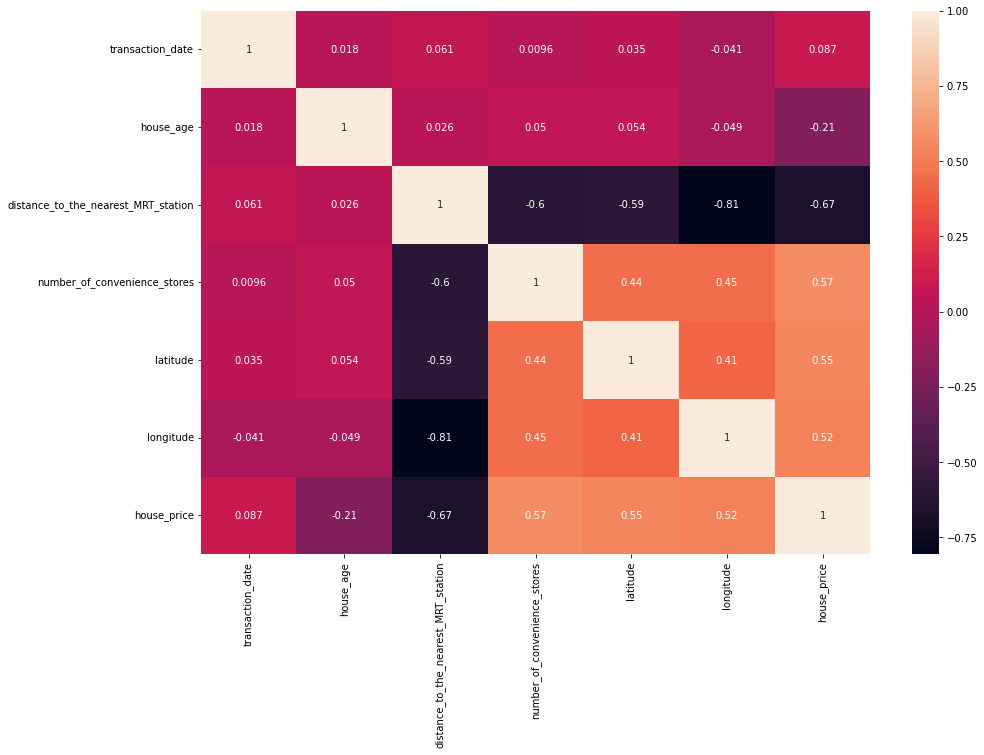

In [84]:
sns.heatmap(df.corr(),annot = True)

Text(0.5, 1.0, 'house_price vs longitude')

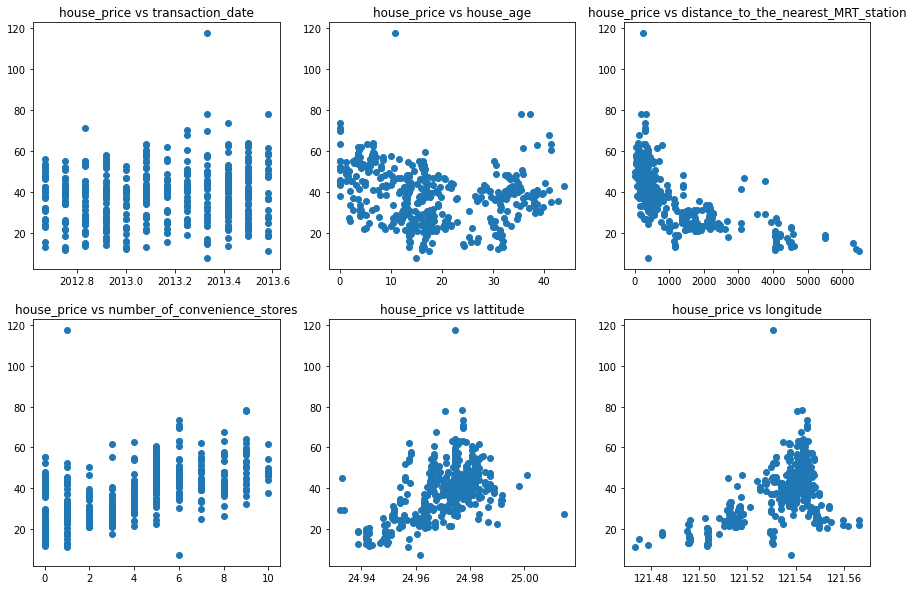

In [85]:
plt.rcParams['figure.figsize'] = [15,10]
fig , axis = plt.subplots(2,3)
axis[0,0].scatter(df.transaction_date,df.house_price)
axis[0,0].set_title('house_price vs transaction_date')
axis[0,1].scatter(df.house_age,df.house_price)
axis[0,1].set_title('house_price vs house_age')
axis[0,2].scatter(df.distance_to_the_nearest_MRT_station,df.house_price)
axis[0,2].set_title('house_price vs distance_to_the_nearest_MRT_station')
axis[1,0].scatter(df.number_of_convenience_stores,df.house_price)
axis[1,0].set_title('house_price vs number_of_convenience_stores')
axis[1,1].scatter(df.latitude,df.house_price)
axis[1,1].set_title('house_price vs lattitude')
axis[1,2].scatter(df.longitude,df.house_price)
axis[1,2].set_title('house_price vs longitude')

Text(0.5, 1.0, 'number_of_convenience_stores')

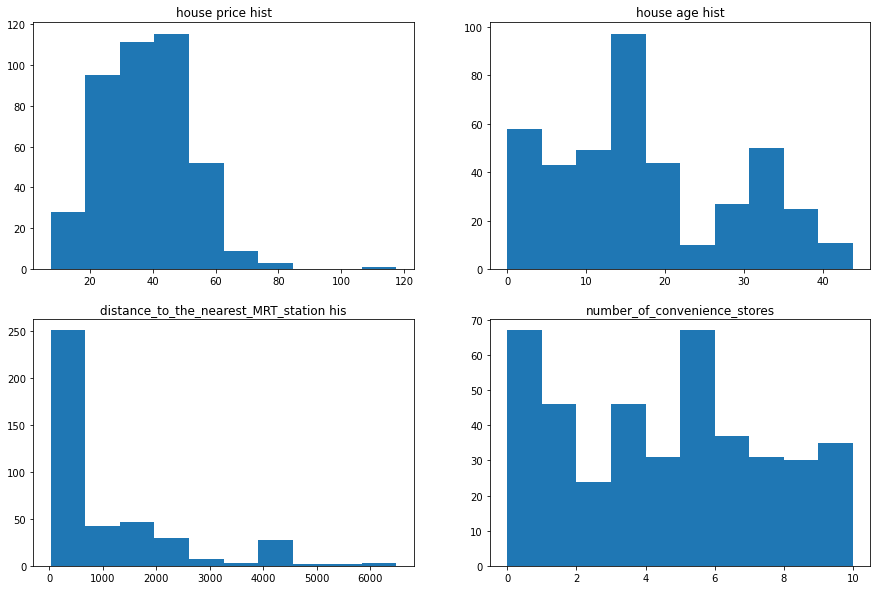

In [86]:
fig , axis = plt.subplots(2,2)
axis[0,0].hist(df.house_price)
axis[0,0].set_title('house price hist')
axis[0,1].hist(df.house_age)
axis[0,1].set_title('house age hist')
axis[1,0].hist(df.distance_to_the_nearest_MRT_station)
axis[1,0].set_title('distance_to_the_nearest_MRT_station his')
axis[1,1].hist(df.number_of_convenience_stores)
axis[1,1].set_title('number_of_convenience_stores')

In [87]:
distance_to_the_nearest_MRT_station = np.log10(df.distance_to_the_nearest_MRT_station)

(array([ 2.,  6., 27., 44., 78., 94., 39., 54., 34., 36.]),
 array([1.36889726, 1.61321876, 1.85754026, 2.10186175, 2.34618325,
        2.59050475, 2.83482625, 3.07914775, 3.32346925, 3.56779075,
        3.81211225]),
 <a list of 10 Patch objects>)

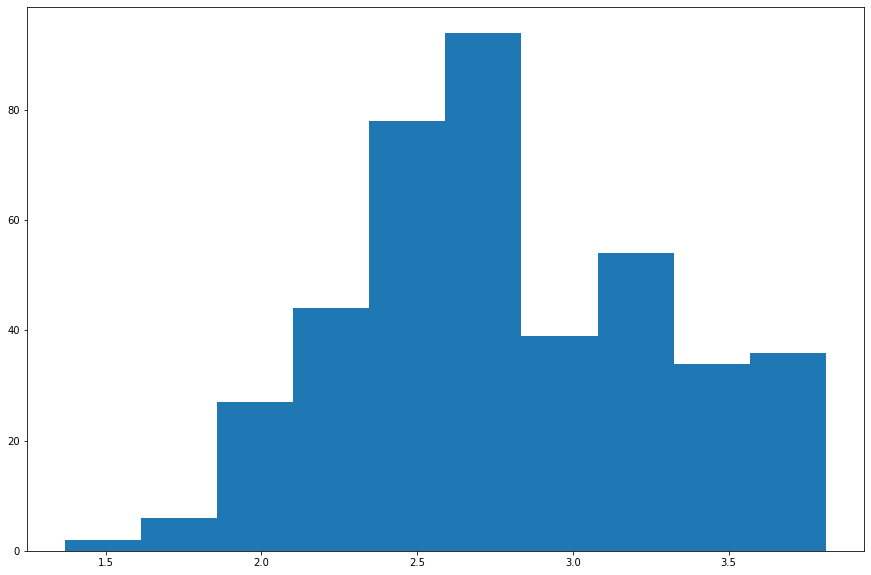

In [ ]:
plt.hist(distance_to_the_nearest_MRT_station)

In [88]:
df['distance_to_the_nearest_MRT_station'] = distance_to_the_nearest_MRT_station

In [89]:
df.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,2012.917,32.0,1.928799,10,24.98298,121.54024,37.9
1,2012.917,19.5,2.486565,9,24.98034,121.53951,42.2
2,2013.583,13.3,2.749724,5,24.98746,121.54391,47.3
3,2013.500,13.3,2.749724,5,24.98746,121.54391,54.8
4,2012.833,5.0,2.591697,5,24.97937,121.54245,43.1


In [90]:
dependent_variable = 'house_price'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [91]:
features = ['house_age' , 'distance_to_the_nearest_MRT_station' , 'number_of_convenience_stores']

In [92]:
X = df[features].values
y = df[dependent_variable].values

In [93]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.33 , random_state= 1)

In [94]:
X_train[0:10]

array([[13.        ,  2.69216923,  5.        ],
       [ 3.5       ,  2.87928958,  3.        ],
       [ 6.5       ,  1.95643767,  9.        ],
       [33.5       ,  3.29637359,  2.        ],
       [25.6       ,  3.65510865,  0.        ],
       [30.        ,  3.00575561,  5.        ],
       [31.7       ,  3.06425352,  0.        ],
       [ 4.1       ,  2.49540043,  5.        ],
       [ 3.8       ,  2.58417557,  5.        ],
       [ 8.9       ,  3.14811812,  0.        ]])

In [95]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [96]:
X_train[0:10]

array([[0.30444965, 0.54161094, 0.5       ],
       [0.08196721, 0.6181987 , 0.3       ],
       [0.15222482, 0.24047839, 0.9       ],
       [0.78454333, 0.78890983, 0.2       ],
       [0.59953162, 0.93573893, 0.        ],
       [0.70257611, 0.66996084, 0.5       ],
       [0.74238876, 0.69390384, 0.        ],
       [0.09601874, 0.46107411, 0.5       ],
       [0.08899297, 0.49740949, 0.5       ],
       [0.20843091, 0.72822935, 0.        ]])

In [97]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [98]:
model.intercept_

59.90161953912226

In [99]:
model.coef_

array([ -7.08467467, -39.44755771,   9.2565637 ])

In [100]:
y_pred_train = model.predict(X_train)
y_pred_train

array([41.00774584, 37.7114489 , 57.66777831, 25.07413186, 18.74151747,
       33.12405946, 27.26922489, 45.66139244, 44.27782564, 29.69808501,
       30.32062116, 47.35004525, 47.72804676, 34.00883763, 45.21714545,
       45.38203326, 32.32255209, 45.92578954, 25.3410355 , 29.49004209,
       29.31753986, 31.67514681, 47.72804676, 49.74868951, 54.80878182,
       47.72804676, 21.05847759, 44.90627671, 30.30402942, 57.65118657,
       42.45014628, 46.50087409, 41.27828283, 52.60054699, 44.06475169,
       29.21273508, 30.42703185, 28.81732803, 43.42587711, 40.0618832 ,
       36.79749564, 61.4445811 , 59.51788275, 27.40378833, 49.12482325,
       43.64554896, 46.66187868, 40.4371548 , 39.43792367, 34.24888269,
       23.96950877, 45.44425118, 38.85434983, 34.61693782, 48.59040912,
       46.84117682, 52.66691396, 36.59435365, 40.95797061, 30.36593118,
       28.44100112, 20.92574364, 66.13233797, 38.03206892, 42.86222884,
       44.28150069, 41.2268123 , 30.31088965, 43.51173683, 29.58

In [101]:
y_pred = model.predict(X_test)
y_pred

array([28.72962583, 54.1833968 , 22.45496857, 18.79878463, 46.60390354,
       28.62419958, 26.83638674, 34.22945863, 41.51489827, 16.47867613,
       17.19327742, 43.35792278, 30.02713012, 54.03547403, 63.03585615,
       28.66032795, 46.60390354, 41.47239573, 27.01349167, 47.24506835,
       62.74282865, 26.24870622, 41.95088896, 50.97267684, 44.6658737 ,
       28.90893648, 28.65067863, 57.58628428, 46.30599724, 18.65145811,
       29.88923412, 34.24255565, 38.04863866, 57.65098451, 53.62171006,
       18.90196788, 40.9037898 , 40.54867101, 29.50483906, 18.75025946,
       39.17373707, 27.63016812, 62.92263076, 29.26733918, 28.89077677,
       32.0167672 , 28.01097079, 40.3123322 , 45.13813692, 33.77175822,
       18.91814294, 53.75650641, 53.74747739, 19.1367098 , 52.0934452 ,
       49.44984727, 46.60390354, 36.32595807, 42.31970453, 42.94476687,
       27.53228522, 48.84194835, 29.18353437, 18.90196788, 40.0979489 ,
       45.8219693 , 59.1204389 , 47.69081334, 19.15288486, 39.45

In [102]:
test_results = pd.DataFrame( y_test, y_pred).reset_index()
test_results.columns = ['predicted' , 'actual' ]
test_results

,predicted,actual
0,28.729626,27.3
1,54.183397,54.4
2,22.454969,22.0
3,18.798785,11.6
4,46.603904,45.4
...,...,...
132,44.332640,40.1
133,43.912606,41.6
134,54.183397,48.6
135,46.317309,42.4


In [103]:
math.sqrt(mean_squared_error(y_test ,y_pred))

10.511648866660874

In [104]:
math.sqrt(mean_squared_error(y_train , y_pred_train))

8.11349619791949

In [105]:
r2_score(y_test , y_pred)

0.4913331693306856

In [106]:
r2_score(y_train , y_pred_train)

0.6092163061929772

In [107]:
import statsmodels.api as sm

In [108]:
mod = sm.OLS(y_train , X_train).fit()

In [109]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              764.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                   8.82e-133
Time:                        21:44:56   Log-Likelihood:                         -1104.4
No. Observations:                 277   AIC:                                      2215.
Df Residuals:                     274   BIC:                                      2226.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3037      2.876     -0.106      0.916      -5.965       5.358
x2            27.5531      2.267     12.152      0.000      23.089      32.017
x3            48.6908      2.169     22.452      0.000      44.422      52.960
==============================================================================
Omnibus:                        9.592   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.902
Skew:                           0.463   Prob(JB):                      0.00708
Kurtosis:                       3.021   Cond. No.                         3.68
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
mod.predict(X_test)

array([42.5882261 , 36.95587893, 25.08827713, 26.79064082, 14.80373266,
       31.11498439, 37.45965375, 38.42297052, 16.23580246, 32.21203999,
       32.09663258, 40.95576126, 18.2644287 , 25.86006881, 46.74396053,
       36.19766985, 14.80373266, 33.51985579, 37.45586399, 34.51177572,
       50.97733211, 43.09796682, 52.27429138, 38.77878594, 37.36851372,
       25.00476309, 37.52345712, 28.17606603, 36.47474847, 26.80960515,
       37.26991687, 29.85239628, 29.50827558, 28.17883998, 46.44884812,
       27.00636219, 37.65791951, 31.80275923, 20.14014427, 26.78856036,
       48.95025173, 18.71552722, 46.73910612, 37.46446742, 31.1086573 ,
       35.44813312, 31.50733464, 33.2029438 , 40.23994723, 24.50972278,
       27.00705568, 43.60867938, 50.23381503, 26.83040975, 55.09443753,
       53.16364924, 14.80373266, 25.91537759, 16.04539789, 37.87516407,
       18.77190453, 11.71761662, 35.60438838, 27.00636219, 17.66918414,
       54.7143372 , 33.90280743, 50.62739841, 26.83110324, 17.72

In [112]:
df = pd.read_csv('post-operative.csv',header=None)

In [113]:
df.head()

,0,1,2,3,4,5,6,7,8
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       90 non-null     object
 1   1       90 non-null     object
 2   2       90 non-null     object
 3   3       90 non-null     object
 4   4       90 non-null     object
 5   5       90 non-null     object
 6   6       90 non-null     object
 7   7       90 non-null     object
 8   8       90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [115]:
df.rename(columns=
               {0 : 'core_temp' ,
                1 : 'surf_temp' ,
                2 : 'o2_satur' ,
                3 : 'bp' ,
                4 : 'surf_temp_stbl' ,
                5 : 'core_temp_stbl' ,
                6 : 'bp_stbl' ,
                7 : 'comfort' ,
                8 : 'decision'},inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   core_temp       90 non-null     object
 1   surf_temp       90 non-null     object
 2   o2_satur        90 non-null     object
 3   bp              90 non-null     object
 4   surf_temp_stbl  90 non-null     object
 5   core_temp_stbl  90 non-null     object
 6   bp_stbl         90 non-null     object
 7   comfort         90 non-null     object
 8   decision        90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [117]:
df['core_temp'] = df['core_temp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
df['surf_temp'] = df['surf_temp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
df['bp'] = df['bp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
df['surf_temp_stbl'] = df['surf_temp_stbl'].replace({'stable' : 2 , 'mod_stable' : 1 ,'unstable' : 0})
df['core_temp_stbl'] = df['core_temp_stbl'].replace({'stable' : 2 , 'mod_stable' : 1 ,'mod-stable' : 1 ,'unstable' : 0})
df['bp_stbl'] = df['bp'].replace({'stable' : 2 , 'mod_stable' : 1 ,'unstable' : 0})
df['o2_satur'] = df['o2_satur'].replace({'poor' : 0 , 'fair' : 1 , 'good' : 2 , 'excellent' : 3})
df['decision'] = df['decision'].replace({'I' : 0 , 'A' : 1 ,'A ' : 1, 'S' : 2})

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   core_temp       90 non-null     int64 
 1   surf_temp       90 non-null     int64 
 2   o2_satur        90 non-null     int64 
 3   bp              90 non-null     int64 
 4   surf_temp_stbl  90 non-null     int64 
 5   core_temp_stbl  90 non-null     int64 
 6   bp_stbl         90 non-null     int64 
 7   comfort         90 non-null     object
 8   decision        90 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 6.5+ KB


In [119]:
df['comfort'].value_counts()

10    65
15    19
?      3
05     2
07     1
Name: comfort, dtype: int64

In [120]:
df['comfort'] = df['comfort'].str.replace('?' , '10').astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_16688\3129749213.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['comfort'] = df['comfort'].str.replace('?' , '10').astype(int)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   core_temp       90 non-null     int64
 1   surf_temp       90 non-null     int64
 2   o2_satur        90 non-null     int64
 3   bp              90 non-null     int64
 4   surf_temp_stbl  90 non-null     int64
 5   core_temp_stbl  90 non-null     int64
 6   bp_stbl         90 non-null     int64
 7   comfort         90 non-null     int32
 8   decision        90 non-null     int64
dtypes: int32(1), int64(8)
memory usage: 6.1 KB


In [123]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(df.drop('decision', axis = 1))
scaled_features = scaler.transform(df.drop('decision', axis = 1))
 
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,core_temp,surf_temp,o2_satur,bp,surf_temp_stbl,core_temp_stbl,bp_stbl,comfort
0,0.112509,-1.345166,1.045478,-0.570352,1.0,0.284975,-0.570352,1.810021
1,0.112509,1.607638,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320
2,1.800141,-1.345166,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320
3,0.112509,-1.345166,-0.956501,1.330821,1.0,-3.660837,1.330821,1.810021
4,0.112509,0.131236,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320


In [124]:
independent_variables = list(set(df_feat.columns.to_list()))

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
      scaled_features, df['decision'], test_size = 0.25)

In [126]:
X_test

array([[ 0.11250879,  0.13123574, -0.95650071,  1.33082093,  1.        ,
         0.28497536,  1.33082093, -0.40331988],
       [ 0.11250879,  0.13123574, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183,  1.81002092],
       [ 0.11250879,  0.13123574,  1.04547753, -0.57035183, -1.        ,
         0.28497536, -0.57035183,  1.81002092],
       [ 1.80014064,  1.60763785,  1.04547753, -0.57035183, -1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 1.80014064,  0.13123574, -0.95650071, -2.47152458,  1.        ,
         0.28497536, -2.47152458, -0.40331988],
       [ 0.11250879,  0.13123574,  1.04547753, -0.57035183, -1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  0.13123574, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  0.13123574, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  0.13123574

In [127]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial',fit_intercept=True, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [128]:
train_preds = model.predict_proba(X_train)
test_preds = model.predict_proba(X_test)

In [129]:
train_class_preds = model.predict(X_train)
test_class_preds = model.predict(X_test)

In [130]:
table = pd.DataFrame(test_class_preds,y_test).reset_index()
table.columns = ['predicted', 'actual']

In [131]:
table

,predicted,actual
0,1,1
1,1,1
2,2,1
3,1,1
4,1,2
5,1,1
6,2,1
7,1,1
8,2,1
9,1,1


In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [133]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7313432835820896
The accuracy on test data is  0.6086956521739131


In [134]:
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

[[ 0  1  0]
 [ 0 14  2]
 [ 0  6  0]]


<AxesSubplot:>

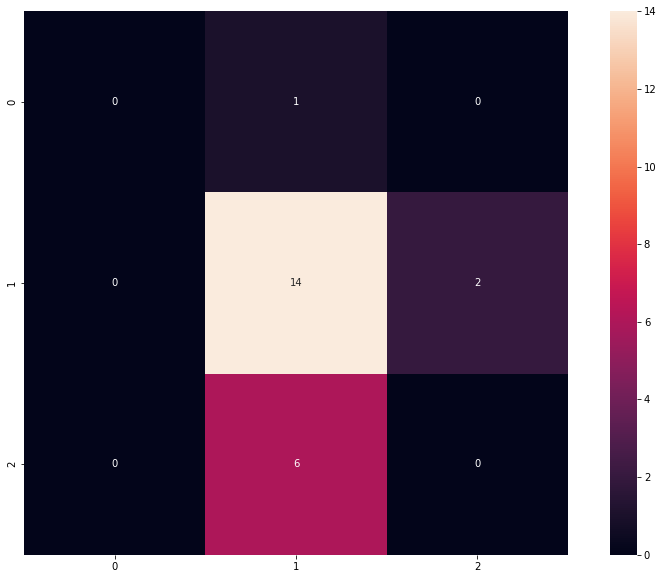

In [135]:
sns.heatmap(cm,square = True,annot = True)

In [136]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

ModuleNotFoundError: No module named 'graphviz'

In [137]:
classf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4, random_state=0)
classf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4, random_state=0)

In [138]:
y_predicted = classf.predict(X_test)

In [139]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [140]:
accuracy_score(y_predicted , y_test)

0.6086956521739131

In [141]:
graph = Source(tree.export_graphviz(classf, out_file=None
   , feature_names=independent_variables, class_names=['0', '1' , '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

NameError: name 'Source' is not defined

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [143]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
test_preds_  = classifier.predict(X_test)
train_preds_ = classifier.predict(X_train)

In [145]:
accuracy_score(y_test , test_preds_)

0.5652173913043478

In [146]:
confusion_matrix(y_test , test_preds_)

array([[ 0,  1,  0],
       [ 0, 13,  3],
       [ 0,  6,  0]], dtype=int64)

In [147]:
feature_imp = pd.Series(classifier.feature_importances_, index = independent_variables).sort_values(ascending = False)
feature_imp

bp                0.223691
core_temp_stbl    0.172899
o2_satur          0.156341
bp_stbl           0.120050
comfort           0.107995
surf_temp         0.096341
core_temp         0.061602
surf_temp_stbl    0.061082
dtype: float64

In [148]:
from sklearn.svm import SVC
SVC_model = SVC().fit(X_train , y_train)

In [149]:
test_p = SVC_model.predict(X_test)

In [150]:
accuracy_score(test_p , y_test)

0.6956521739130435

In [151]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 13)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


In [152]:
accuracy_score(pred , y_test)

0.6956521739130435

In [153]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
 
print(classification_report(y_test, pred))

[[ 0  1  0]
 [ 0 16  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.70      1.00      0.82        16
           2       0.00      0.00      0.00         6

    accuracy                           0.70        23
   macro avg       0.23      0.33      0.27        23
weighted avg       0.48      0.70      0.57        23



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


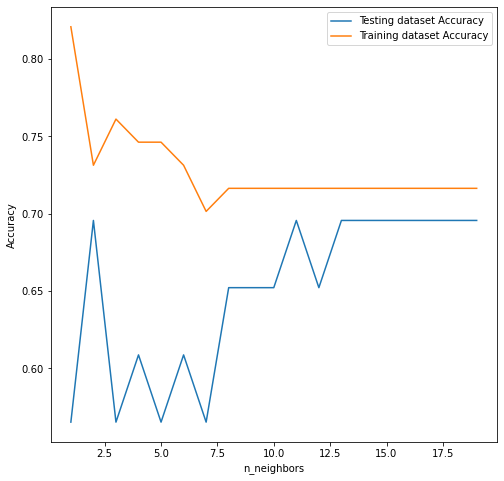

In [154]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
        
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knn_model = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

In [157]:
tst_p = knn_model.predict(X_test)

In [158]:
accuracy_score(y_test , tst_p)

0.6086956521739131